In [5]:
"""
using the implementation of MTCNN below
https://github.com/ipazc/mtcnn
that is based on the 2016 paper below 
https://kpzhang93.github.io/MTCNN_face_detection_alignment/paper/spl.pdf
"""

import mtcnn

In [9]:
import cv2
import matplotlib.pyplot as plt
import skimage
import collections
import json
import codecs
import seaborn as sns 

In [79]:
def locate_all_faces(jpg_string):
    """
    jpg_string: a string for the name/location of the image 
    e.g 'test_image.jpg'
    output: the image with a box drawn around each face
    """
    image = cv2.cvtColor(cv2.imread(jpg_string), cv2.COLOR_BGR2RGB)
    detector = mtcnn.MTCNN()
    faces_json = detector.detect_faces(image)
    boxes = [faces_json[i]['box'] for i in range(len(faces_json))]
    for (x,y,w,h) in boxes:
        cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2BGRA))
    plt.axis('off')

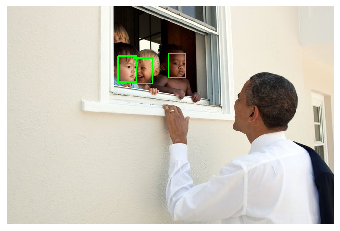

In [62]:
locate_all_faces("babies.jpg")

In [29]:
image = cv2.cvtColor(skimage.io.imread('http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb064277d86016431e33e4e003d/2ccfb2b7-e9cf-4c83-a0ce-691ac9650ef7___childrenfamilies_mainphoto.png'), cv2.COLOR_BGR2RGB)

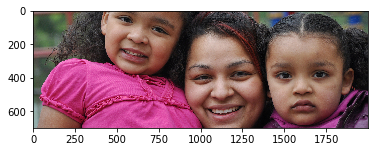

In [30]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

In [24]:
"""
test data imported from
https://www.kaggle.com/dataturks/face-detection-in-images

in order to access each row of the data I used
https://www.kaggle.com/volkankalin/getting-images-with-requests
"""
jsonData = []
with codecs.open('face_detection.json', 'rU', 'utf-8') as js:
    for line in js:
        jsonData.append(json.loads(line))

print(f"{len(jsonData)} image found!")

print("Sample row:")
jsonData[0]['']

409 image found!
Sample row:


{'content': 'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb064277d86016431e33e4e003d/8186c3d1-e9d4-4550-8ec1-a062a7628787___0-26.jpg.jpeg',
 'annotation': [{'label': ['Face'],
   'notes': '',
   'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063},
    {'x': 0.1723076923076923, 'y': 0.45345345345345345}],
   'imageWidth': 650,
   'imageHeight': 333},
  {'label': ['Face'],
   'notes': '',
   'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913},
    {'x': 0.6584615384615384, 'y': 0.46846846846846846}],
   'imageWidth': 650,
   'imageHeight': 333}],
 'extras': None}

In [61]:
def compare_num_faces_found(jsonData):
    count_true = 0
    count_false = 0
    for i in range(len(jsonData)):
        #print(jsonData[i]['content'])
        image = cv2.cvtColor(skimage.io.imread(jsonData[i]['content']), cv2.COLOR_BGR2RGB)
        detector = mtcnn.MTCNN()
        faces_json = detector.detect_faces(image)
        boxes = [faces_json[i]['box'] for i in range(len(faces_json))]
        #print(boxes)
        #print(jsonData[i]['annotation'][0]['points'])
        if len(boxes) >= len(jsonData[i]['annotation']):
            count_true += 1
        else:
            count_false +=1
        # check the counters every ten images to track progress
        counts = [count_true, count_false]
        if sum(counts) % 10 == 0:
            print(counts)
    return (count_true,count_false)

In [62]:
# the original data set has 400 images and it was taking me quite a while to loop through them
# I opted out for a subset of 100 images for testing

test = []
with codecs.open('test.json', 'rU', 'utf-8') as js:
    for line in js:
        test.append(json.loads(line))

In [63]:
compare_num_faces_found(test)

[7, 3]
[13, 7]
[21, 9]
[23, 17]
[29, 21]
[36, 24]
[43, 27]
[49, 31]
[55, 35]
[61, 39]


(61, 39)

In [70]:
def faces_found_graph(jsonData):
    """
    jsonData: imported data in json format with links 
              to images and coordinates for boxes for 
              each face
    count_diff: a dictionary with the counter for the 
                difference of faces found by mtcnn on 
                an image and the actual number given 
                in the data set
    """
    count_diff = {}
    progress = 0
    for i in range(len(jsonData)):
        print(jsonData[i]['content'])
        image = cv2.cvtColor(skimage.io.imread(jsonData[i]['content']), cv2.COLOR_BGR2RGB)
        detector = mtcnn.MTCNN()
        faces_json = detector.detect_faces(image)
        boxes = [faces_json[i]['box'] for i in range(len(faces_json))]
        print(boxes)
        diff = len(boxes) - len(jsonData[i]['annotation'])
        if diff in count_diff.keys():
            count_diff[diff] += 1
            progress +=1
        else:
            count_diff[diff] = 1
            progress +=1
        # check the dictionary every ten images to track progress
        if progress % 10 == 0:
            print(count_diff)
    return (count_diff)

In [71]:
faces_found_graph(test)

http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb064277d86016431e33e4e003d/662ab0d8-c0dd-444a-b56f-c439b77984e5___by5-support-families.jpg.jpeg
[[123, 112, 109, 146], [462, 70, 101, 126], [788, 282, 99, 127], [663, 354, 69, 89]]
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb064277d86016431e33e4e003d/d0c955d2-62a3-4bc7-a379-37ec75fa654f___c12bd72009000fa249ee4260b2b9b4c5.jpg.jpeg
[[61, 35, 22, 27]]
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb064277d86016431e33e4e003d/902f89f7-7667-44d2-91f3-878cf7068afe___Calm-Waters-One-0034.jpg.jpeg
[[1720, 574, 924, 1161], [2713, 1428, 824, 1154], [3505, 1227, 1044, 1309], [1736, 3727, 118, 155]]
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb064277d86016431e33e4e003d/02c79eb8-17b0-4183-9b2a-6eed49bfb88d___capture19.png
[]
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb064277d86016431e33e4e003d/44838d85-0272-4fb2-bf23-6a10e6ceaae1___ccd14b312d272c03bf2cadb42441c917.jpg.jpeg
[[127, 7, 156, 219]]

{-2: 12, 0: 48, 1: 6, -1: 23, 2: 2, 3: 2, -3: 3, 7: 1, 5: 1, 12: 1, -4: 1}

In [72]:
"""
ordering the produced dictionary by key
https://stackoverflow.com/questions/9001509/how-can-i-sort-a-dictionary-by-key
"""

d = {-2: 12, 0: 48, 1: 6, -1: 23, 2: 2, 3: 2, -3: 3, 7: 1, 5: 1, 12: 1, -4: 1}
od = collections.OrderedDict(sorted(d.items()))

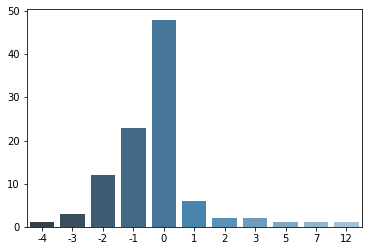

In [77]:
sns.barplot(x=list(od.keys()), y=list(od.values()), palette='Blues_d')

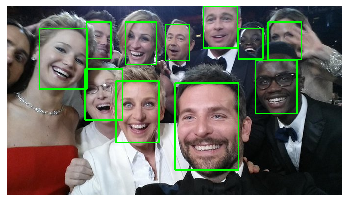

In [78]:
locate_all_faces('ellen.jpg')